In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

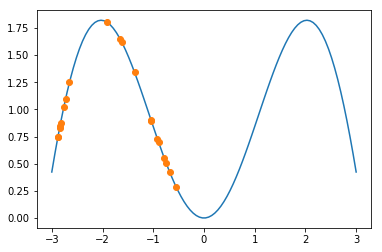

In [2]:
def f(x):
    return x*np.sin(x)
some_x = np.linspace(-3,3,100).reshape((100,1))
f_some_x = f(some_x)
x_train =  np.random.uniform(-3,-0.5,20).reshape((20,1))
y_train = f(x_train)
plt.plot(some_x,f_some_x)
plt.plot(x_train,y_train,'o')

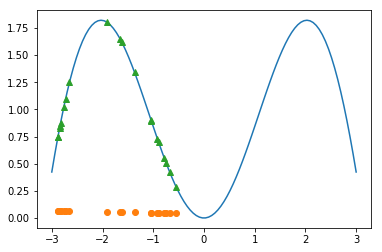

In [6]:

input_dim = 1
number_of_hidden_units = 10
output_dim = 1

#placeholders for our training points
x = tf.placeholder(tf.float32,[None, input_dim])
y = tf.placeholder(tf.float32,[None, output_dim])
# Layer 1
W1 = tf.Variable(tf.random_normal([input_dim, number_of_hidden_units], stddev=0.1),name ='W1')
b1 = tf.Variable(tf.zeros([number_of_hidden_units]),name='b1')
pre_active = tf.matmul(x , W1) + b1
post_active = tf.nn.sigmoid(pre_active)

# Layer 2
W2 = tf.Variable(tf.random_normal([number_of_hidden_units, output_dim], stddev=0.1),name ='W2')
b2 = tf.Variable(tf.zeros([output_dim]),name='b2')    
model_pred = tf.matmul(post_active , W2) + b2

loss = tf.reduce_sum(tf.square(model_pred - y))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

init = tf.global_variables_initializer()

#run the initilizer
sess = tf.InteractiveSession()

sess.run(init)
    
y_hat = sess.run(model_pred, feed_dict={x:x_train, y:y_train})
plt.plot(some_x, f_some_x)    
plt.plot(x_train, y_hat,'o')    
plt.plot(x_train, y_train,'^')     

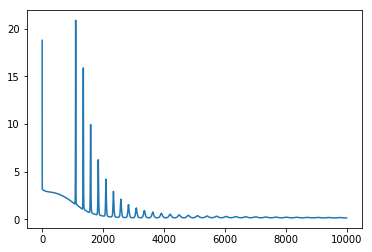

In [7]:
error_seq=[]
for i in range(10000):
    training_error, _ = sess.run([loss,optimizer],feed_dict= {x:x_train, y:y_train})
    error_seq += [training_error]
plt.plot(error_seq)


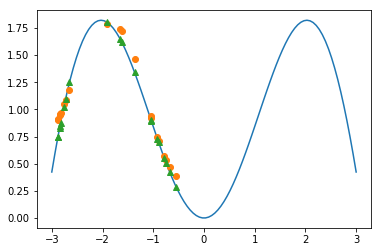

In [10]:
y_hat = sess.run(model_pred, feed_dict= {x:x_train, y:y_train})
plt.plot(some_x, f_some_x)    
plt.plot(x_train, y_hat,'o')    
plt.plot(x_train, y_train,'^')     